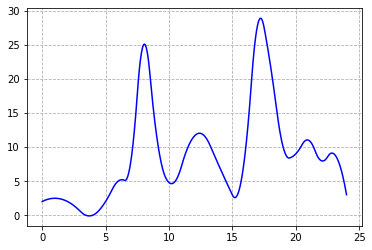

一天总共: 12662.68803062362


In [5]:
#7.1

#这里的点较散乱，所以我选取高阶的样条插值，即使用高阶曲线
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.grid(linestyle='--')       #设置网格线---这里是虚线
X = np.array([0,2,4,5,6,7,8,9,10.5,11.5,12.5,14,16,17,18,19,20,21,22,23,24])
Y = np.array([2,2,0,2,5,8,25,12,5,10,12,7,9,28,22,10,9,11,8,9,3])
xnew= np.linspace(0,24,24*60)#每一分钟插值一个数据
f=interp1d(X,Y,'quadratic')# 引入插值函数
ynew=f(xnew)
plt.plot(xnew,ynew,c='b')
plt.show()
c=sum(ynew) #计算一天的车辆总数
print('一天总共:',c)

拟合的参数值为： [  1.9897382  -51.13938268 347.8967033 ]
预测值为： [39.03956044]


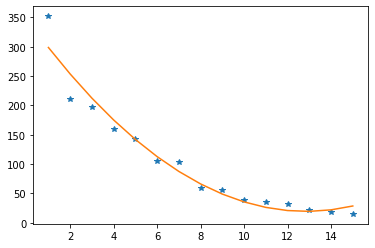

In [12]:
#7.2

#平滑下降，目测应该属于二次函数型
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
t0 = np.arange(1,16)
y0 = np.array([352,211,197,160,142,106,104,60,56,38,36,32,21,19,15])
y = lambda x,a,b,c: a*x**2+b*x+c
popt,pcov = curve_fit(y,t0,y0)
print('拟合的参数值为：',popt)
print('预测值为：',y(np.array([16]),*popt))#虽然拟合效果较好，但是预测效果不符合预期
plt.plot(t0,y0,'*',t0,y(t0,*popt),'-')
plt.show()

拟合的参数值为： [0.07616618 0.05131891 1.99633095]


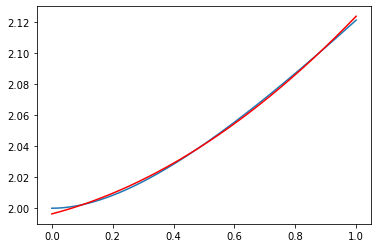

原函数的积分值为： 2.04737854124365
插值函数的积分值为： 2.0473166666666667


In [33]:
#7.3

#解读认为，题目中应该为拟合函数，指代给出1000点，求相应的拟合函数，再求定积分
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate
x0 = np.linspace(0,1,1000)
f = lambda x: (x+2)/np.sqrt(x+1)
y0 = f(x0)#可以通过print输出y0的值
plt.plot(x0,y0,'-')#看出来曲线是单调递增，尝试使用二次函数拟合
x1 = x0
y1 = y0
y = lambda x,a,b,c: a*x**2+b*x+c
popt,pcov = curve_fit(y,x1,y1)
print('拟合的参数值为：',popt)
plt.plot(x1,y(x1,*popt),'-',c = 'r')# 可以看出来拟合的效果还是不错的
plt.show()
v1,err1=integrate.quad(f,0,1)#integrate.quad()求一重积分，err是误差
print('原函数的积分值为：',v1)
f2 = lambda x :0.0761*x**2+0.0513*x+1.9963
v2,err2=integrate.quad(f2,0,1)
print('插值函数的积分值为：',v2)
#可以看出插值函数的积分值和原函数的积分制几乎一致，表明原函数的拟合效果较好

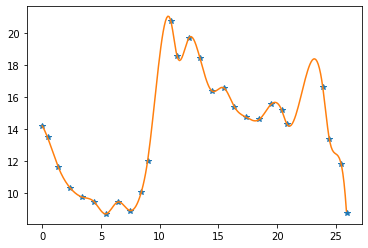

In [38]:
#7.4

#水箱水流量问题,目的是得到插值函数
'''
参考建模方法：https://wenku.baidu.com/view/0dbbb58910661ed9ac51f350.html
先将时间换算成小时，水位高度变换为水的体积。
可知水泵在8.968h时开始第一次泵水，10.954h第一次泵水停止；在20.839h开始第二次泵水，22.880h时第二次泵水停止
基础知识：水流量= v*t的函数
可通过牛顿公式计算区间内的平均流量
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
t0 = np.array([0,0.46,1.38,2.4,3.41,4.43,5.44,6.46,7.47,8.45,8.97,10.96,
               11.49,12.49,13.42,14.43,15.44,
               16.37,17.38,18.49,19.5,20.4,
               20.84,23.88,24.44,25.45,25.91]) #时间中点
y= np.array([14.21,13.49,11.62,10.32,9.76,9.46,8.71,9.46,
             8.92,10.1,11.99,20.75,18.56,19.71,18.48,16.41,
             16.6,15.4,14.75,14.62,15.57,15.18,14.32,16.67,
             13.41,11.83,8.78])#对应的水流速度
plt.plot(t0,y,'*')
xnew= np.arange(0,26,0.1)#每隔0.1插值一个数据
f=interp1d(t0,y,'cubic')# 使用三次函数插值
ynew=f(xnew)#得出相应的插值流速
plt.plot(xnew,ynew,'-')#可见最后的拟合效果还不错
plt.show()
##最终任意时刻的流量s = 对单位时间内f(t)的积分
##插值函数的选择对最终的结果具有重要影响，本题曲线形式可能还需要sin(x),cos(x)辅助、

线性最小二乘拟合:	W = 0.567167
	b = -1081.609778
三次函数拟合的参数为： [ 4.80505415e-04 -2.83430313e+00  5.57334936e+03 -3.65345865e+06]


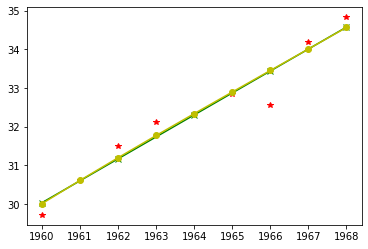

In [79]:
#7.5

#试求人口增长情况下最佳的拟合曲线,将人口单位化为亿便于科学计算
#从散点图可知，不适合用二次曲线，只适合用一次曲线和三次曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
years = np.arange(1960,1969,1)
people = np.array([29.72,30.61,31.51,32.13,32.34,32.85,32.56,34.2,34.83])
plt.plot(years,people,'*',c = 'r')#简单的直线形式可能并不满足需求，
#线性回归
Lr = LinearRegression()
Lr.fit(years.reshape(-1,1),people)
y_hat = Lr.predict(np.arange(1960,1969,2).reshape(-1,1))
print('线性最小二乘拟合:\tW = %f\n\tb = %f'%(Lr.coef_,Lr.intercept_))
plt.plot(np.arange(1960,1969,2), y_hat, color = 'g', marker = 'x')#可见线性回归的效果似乎不是很理想，但是也很解决设想
y = lambda x,a,b,c,d: a*x**3+b*x**2+c*x+d
popt,pcov = curve_fit(y,years,people)
print('三次函数拟合的参数为：', popt)
f = lambda x:4.80505415e-04*x**3-2.83430313e+00*x**2+5.57334936e+03*x-3.65345865e+06
plt.plot(np.arange(1960,1969,1),[f(i) for i in range(1960,1969)],c='y',marker = 'o')#发生了很奇怪的现象，三次函数似乎和一次函数相重合。。。。。。

2637.794164508323 0.7442541221796378 -13.02922367089761
继续往后4.5年的价格为： 35.88979778875742


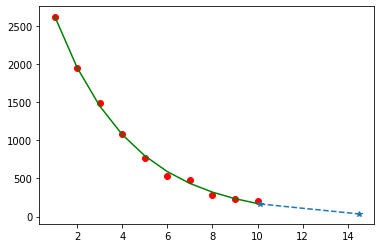

In [87]:
#7.6

#指数融合性数据拟合
from scipy.optimize import curve_fit
def func(x, a, b, c): # 指数函数拟合
    return a * (b**(x-1)) + c
year = np.arange(1, 11, 1)
price = [2615, 1943, 1494, 1087, 765, 538, 484, 290, 226, 204]
popt, pcov = curve_fit(func, year, price)
a = popt[0]
b = popt[1]
c = popt[2]
print(a,b,c)
plt.plot(year,price,'o',c= 'r')
plt.plot(year,[func(i, a, b, c) for i in year],c = 'g')
price_fit = func(year, a, b, c)
print('继续往后4.5年的价格为：',func(14.5,a,b,c))
plt.plot([10.1,14.5],[func(i, a, b, c) for i in [10.1,14.5]],linestyle = '--',marker = '*')

此时预估的国土面积为： 42441.97061728394
误差比例为：0.028%


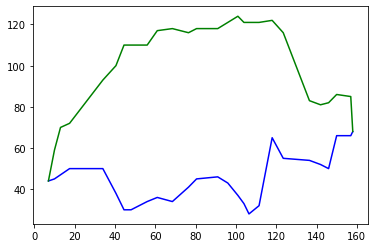

In [135]:
#7.7

#y1指代南边界点，y2指代北边界点
#分别替换插值函数（zero，linear，quadratic，cubic）线性插值函数比较准确
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
x = np.array([7,10,13.0,17.5,34,40.5,44.5,48,56,61,68.5,76.5,80.5,91,96,101,104,106.5,111.5,118,123.5,136.5,142,146,150,157,158])
y1 = np.array([44,45,47,50,50,38,30,30,34,36,34,41,45,46,43,37,33,28,32,65,55,54,52,50,66,66,68])
y2 = np.array([44,59,70,72,93,100,110,110,110,117,118,116,118,118,121,124,121,121,121,122,116,83,81,82,86,85,68])
xnew= np.arange(7,158,0.01) #设置插值步长
f1 = interp1d(x,y1,kind ='linear',fill_value="extrapolate")
yi1 = f1(xnew)
f2 = interp1d(x,y2,kind = 'linear',fill_value="extrapolate")
yi2 = f2(xnew)
plt.plot(x,y1,'b',x,y2,'g')#模拟的地形图与真实的地形平面图还是有一定的差异
integ = np.trapz(yi2-yi1,xnew)#梯形法计算定积分
a = integ/(18**2)*(40**2)#算出来的地图面积除以卡尺比列，再乘以真实的比例即为正确数据
print('此时预估的国土面积为：',a)
print('误差比例为：{:.3f}%'.format((a-41288)/41288))